<a href="https://colab.research.google.com/github/amandasmagalhaes/data-science-flai/blob/main/An%C3%A1lise%20de%20Sobreviv%C3%AAncia%20R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Sobrevivência**

## **Característica dos dados de Análise de Sobrevivência**  

**Evento:** O que você quer prever?
* Morte;
* Falha;
* Recorrência;
* Etc;

**Tempo:** Período do estudo/acompanhamento
* Dias;
* Semanas;
* Anos;
* Etc;

**Censura:** Ocorre quando não observamos o evento de interesse
* Paciente saiu do estudo;
* Morte por outras causas;
* Não ocorreu o evento;



## **Outras aplicações**

* Ciências Atuarias: Tempo decorrido até um usuário de seguro fazer o uso do mesmo (sinistro)
* Finanças: Tempo até um cliente de uma instituição financeira se tornar inadimplente
* Criminologia: Tempo até que um ex-detento reincidir em algum delito (reincidência)
* Farmacologia: Tempo até um medicamento causar algum efeito colateral
* Engenharia: Número de ciclos até um dispositivo eletrônico/mecânico deixe de funcioanr corretamente



## **Definição**

**Análise de sobrevivência ou confiabilidade:** É uma área da estatítica em que o interesse é estimar o tempo até a ocorrência de um determinado evento.

Principal característica: dados censurados.



## **Representação dos dados**

Variável que indica a presença de censura: 
* 1 se é um tempo de falha
* 0 se é um tempo censurado



## **Função de Sobrevivência**

Probabilidade de uma função não falhar até um certo tempo t, ou seja, a probabilidade de uma observação sobreviver até um tempo t.



## **Funções de Interesse**

**Função de Risco:** É a probabilidade instantânea de um indivíduo sofrer o evento em um intervalo de tempo dado que ele sobreviveu até o tempo t.



## **Objetivo em Análise de Sobrevivência**

* Estimar ou interpretar a função de sobrevivência
* Comparar função de sobrevivência e ou função de risco
* Avaliar a relação entre variáveis com o tempo de sobrevida



## **Como estimar a função de sobrevivência?**

**Estimador Kaplan Meier**

O que é: técnica não paramétrica de estimação da função de sobrevivência.

Objetivo: descrever e comparar o comportamento da função de sobrevivência para diferentes grupos de indivíduo.

Nota:
* É uma técnica empírica que se baseia na ocorrência dos eventos e nas censuras ao longo do tempo;
* Não incorpora covariáveis;
* Não incorpora variáveis dependentes no tempo.

___

# **Ensaio clínico**
Estes são os dados de um dos primeiros ensaios clínicos bem-sucedidos de quimioterapia adjuvante para câncer de cólon.  
O levamisol é um composto de baixa toxicidade usado anteriormente para tratar infestações de vermes em animais; 5-FU é um agente quimioterápico moderadamente tóxico (como essas coisas acontecem).  
Existem dois registros por pessoa, um para recorrência e outro para óbito.

## **Objetivo**
O objetivo principal do estudo era avaliar se o teste de quimioterapia é benéfico.  
Os objetivos secundários incluíram a análise de covariáveis como variáveis prognósticas.

## **Coleta de Dados**
* rx: Tratamento - Observação (obs), Lev (amisol), Lev (amisol) + 5-FU  
* sexo (1 = masculino)
* idade em anos
* obstrução: obstrução do cólon por tumor
* perfuração: perfuração do cólon
* aderir: aderência a órgãos próximos
* nódulos: números de nódulos linfáticos com câncer detectável
* tempo: dias até o evento ou censura
* status: status de censura
* diferem: diferenciação do tumor (1 = bem, 2 = moderado, 3 = fraco)
* extensão: extensão da propagação local (1 = submucosa, 2 = músculo, 3 = serosa, 4 = estruturas contiguas)
* cirurg: tempo desde a cirugia até o registro (0 = curto, 1 = longo)
* node4: mais de 4 linfonodos positivos
* tipo de evento (1 = recorrência, 2 = morte)


## **Resumo Ensaio Clínico**

Estudo com 1858 pacientes com câncer de colón.

Objetivo: investigar o tempo de vida dos pacientes com câncer de colón.

Cada paciente foi acompanhado por 10 anos ou até a morte (evento de interesse) ou até a perda de acompanhamento.

938 pacientes (50,5%) não apresentou o evento de interesse, censura.


In [ ]:
#Pacotes

install.packages('survival')
library(survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Conjunto de dados dentro do pacote 'survival'

#Primeiras linhas
head(colon)

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,2
2,1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,1
3,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
4,2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
5,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,2
6,3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,1


In [ ]:
#Tempo
t1 = colon$time

#Censura
cens = colon$status

#Fator
x1 = factor(colon$rx)

#Controle: Obs = 0
#Tratamento: Lev, Lev+5-FU = 1
x1 = ifelse(x1 == 'Obs', 0, 1)
x1

[1] 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1
  [38] 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0
  [75] 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0
 [112] 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 [149] 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1
 [186] 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 [260] 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 [297] 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1
 [334] 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1
 [371] 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0
 [408] 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [445] 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1
 [482] 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 [519] 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0
 [556] 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1
 [593] 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1
 [630] 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 [667] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
 [704] 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 [741] 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 [778] 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1
 [815] 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0
 [852] 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 [889] 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1
 [926] 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 [963] 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1000] 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1
[1037] 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
[1074] 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0
[1111] 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1
[1148] 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1
[1185] 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1
[1222] 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1
[1259] 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
[1296] 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0
[1333] 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1
[1370] 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1
[1407] 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1
[1444] 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1
[1481] 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
[1518] 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1
[1555] 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
[1592] 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
[1629] 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
[1666] 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0
[1703] 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1
[1740] 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1
[1777] 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0
[1814] 0 0 0 1 1 1 1 1 1 1 1 1 1 0

In [ ]:
table(x1, cens)

   cens
x1    0   1
  0 285 345
  1 653 575

In [ ]:
#Descritiva
summary(colon)

       id          study         rx           sex             age       
 Min.   :  1   Min.   :1   Obs    :630   Min.   :0.000   Min.   :18.00  
 1st Qu.:233   1st Qu.:1   Lev    :620   1st Qu.:0.000   1st Qu.:53.00  
 Median :465   Median :1   Lev+5FU:608   Median :1.000   Median :61.00  
 Mean   :465   Mean   :1                 Mean   :0.521   Mean   :59.75  
 3rd Qu.:697   3rd Qu.:1                 3rd Qu.:1.000   3rd Qu.:69.00  
 Max.   :929   Max.   :1                 Max.   :1.000   Max.   :85.00  
                                                                        
    obstruct          perfor            adhere           nodes      
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   : 0.00  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.: 1.00  
 Median :0.0000   Median :0.00000   Median :0.0000   Median : 2.00  
 Mean   :0.1938   Mean   :0.02906   Mean   :0.1453   Mean   : 3.66  
 3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.: 5.00  
 M

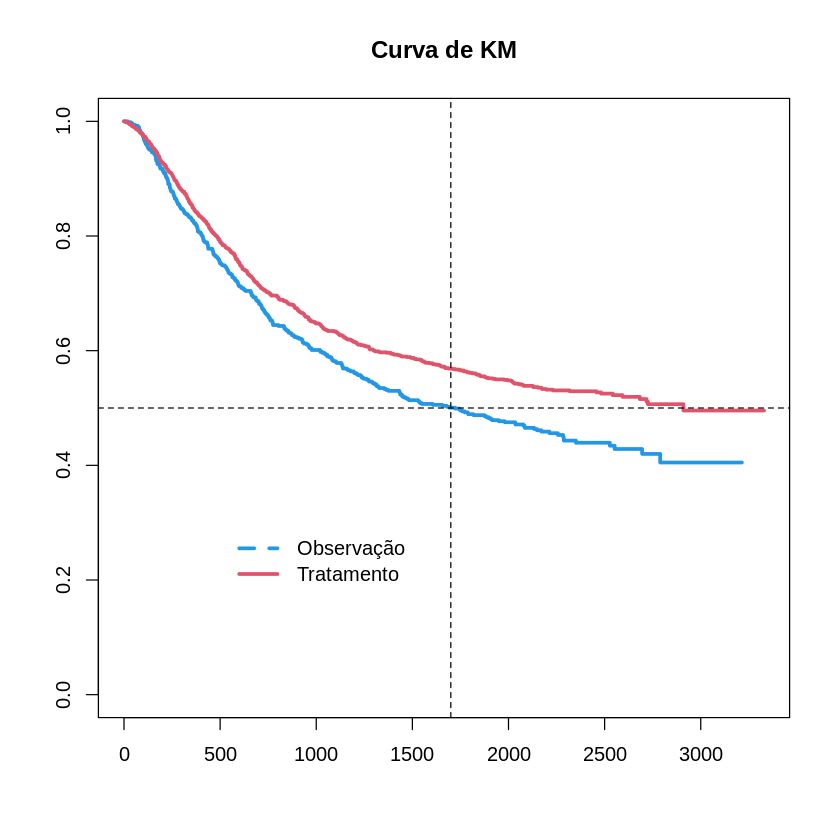

In [ ]:
#Curva de Kaplan-Meier

ekm <- survfit(Surv(t1, cens) ~ x1)

plot(ekm, col=c(4,2), lwd=3, main='Curva de KM')
legend(500, 0.3, col=c(4,2), lty=c(2,1), c('Observação', 'Tratamento'), lwd=3, bty='n')
abline(h=0.5, lty=2)
abline(v=1700, lty=2)

In [ ]:
#Teste log-rank


#comparação das curvas de sobrevivência

#h0: as curvas de sobrevivência são iguais 
#h1: exite diferença entre as curvas

survdiff(Surv(t1, cens) ~ x1, rho=0)

#Existe diferença entre as curvas de sobrevivência (p = 0,001)

Call:
survdiff(formula = Surv(t1, cens) ~ x1, rho = 0)

        N Observed Expected (O-E)^2/E (O-E)^2/V
x1=0  630      345      299      7.01      10.4
x1=1 1228      575      621      3.38      10.4

 Chisq= 10.4  on 1 degrees of freedom, p= 0.001 

In [ ]:
#Modelo de COX

cox <- coxph(Surv(t1, cens) ~ x1)
summary(cox)

Call:
coxph(formula = Surv(t1, cens) ~ x1)

  n= 1858, number of events= 920 

       coef exp(coef) se(coef)      z Pr(>|z|)   
x1 -0.21927   0.80311  0.06813 -3.218  0.00129 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

   exp(coef) exp(-coef) lower .95 upper .95
x1    0.8031      1.245    0.7027    0.9178

Concordance= 0.523  (se = 0.008 )
Likelihood ratio test= 10.15  on 1 df,   p=0.001
Wald test            = 10.36  on 1 df,   p=0.001
Score (logrank) test = 10.4  on 1 df,   p=0.001


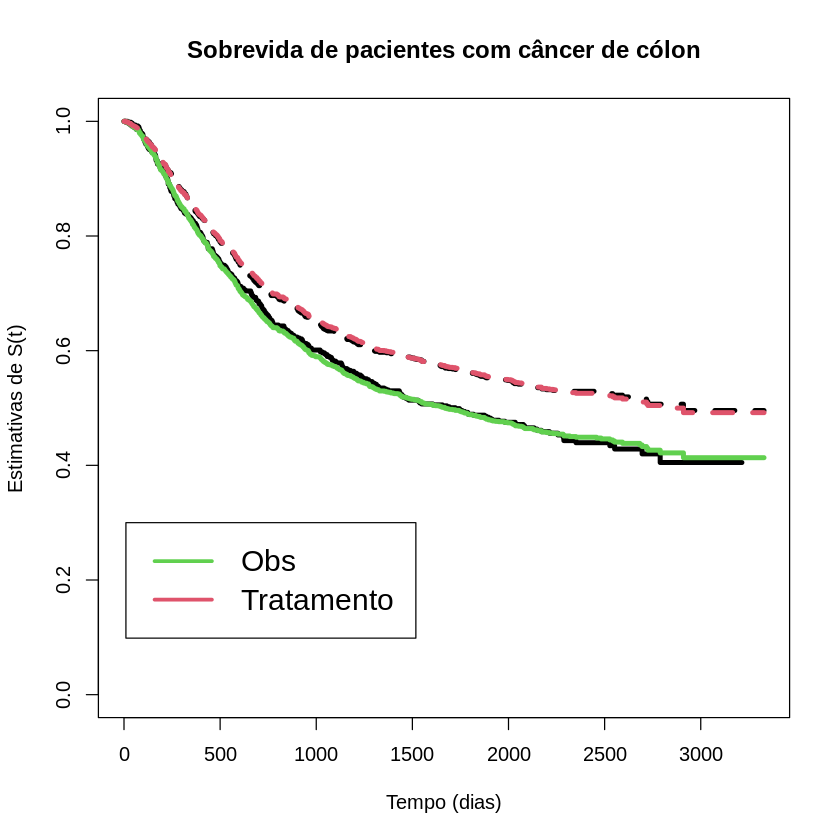

In [ ]:
# Resultado Final

plot(ekm, main = 'Sobrevida de pacientes com câncer de cólon',
      ylab = 'Estimativas de S(t)',
      xlab = 'Tempo (dias)',
      lwd=4, col=c(1, 1), lty=c(1,2), cex=1.5)
lines(survfit(cox, type='breslow', newdata = data.frame(x1=c(0, 1)), add=TRUE),
      lty=c(1, 2), col=c(3,2), lwd=4, cex=1.5)
legend(10, 0.3, legend=c('Obs', 'Tratamento'), lwd=3, col=c(3, 2), cex=1.5)